In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils
import joblib
from sklearn.metrics import confusion_matrix
import sklearn

In [84]:
df=pd.read_csv("indian_liver_patient.csv")

In [85]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [86]:
df1=df.fillna(df.mean())

In [87]:
df1['Dataset'] = df1['Dataset'].replace(to_replace={1:0,2:1})

In [88]:
df1['Gender'] = df1['Gender'].replace(to_replace={'Male':1,'Female':0})

In [89]:
df1.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


In [90]:
x=df1[["Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]]         
y=df1['Dataset']
x.head()




 



,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.20, random_state=21)

In [92]:
x_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
473,42,1,1.0,0.3,154,38,21,6.8,3.9,1.300000
142,30,1,1.6,0.4,332,84,139,5.6,2.7,0.900000
497,67,1,2.2,1.1,198,42,39,7.2,3.0,0.700000
332,26,1,7.1,3.3,258,80,113,6.2,2.9,0.800000
319,14,1,0.9,0.3,310,21,16,8.1,4.2,1.000000
293,23,1,1.1,0.5,191,37,41,7.7,4.3,1.200000
290,45,0,1.0,0.3,250,48,44,8.6,4.3,1.000000
437,35,1,1.6,0.7,157,15,44,5.2,2.5,0.900000
405,31,0,0.8,0.2,215,15,21,7.6,4.0,1.100000
493,65,1,0.7,0.2,265,30,28,5.2,1.8,0.520000


In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [95]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC()
logit = LogisticRegression()
ran=RandomForestClassifier()
xgb= XGBClassifier()

In [96]:
logit.fit(x_train,y_train)
y_pred=logit.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)


0.7692307692307693

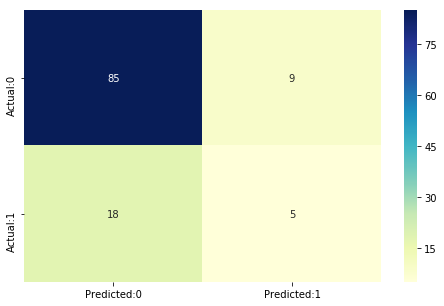

In [97]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [98]:
# Fit the model
dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.6581196581196581

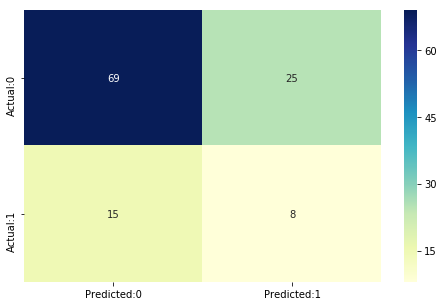

In [99]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [100]:
# Fit the model
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.6581196581196581

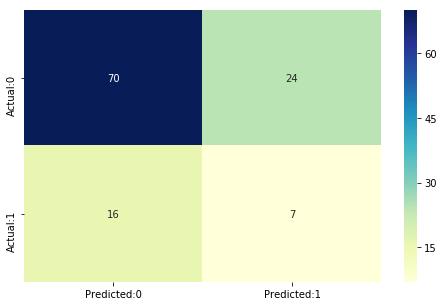

In [101]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [102]:
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.7948717948717948

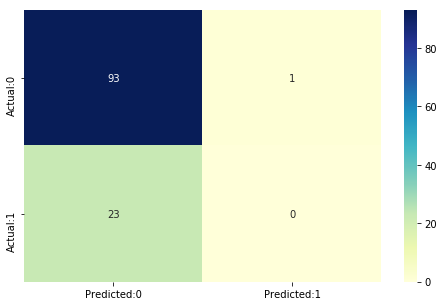

In [103]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [104]:
ran.fit(x_train, y_train)
y_pred=ran.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.7264957264957265

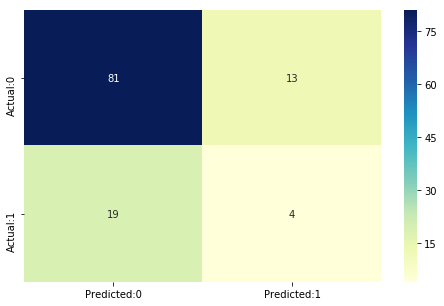

In [105]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [106]:
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.7435897435897436

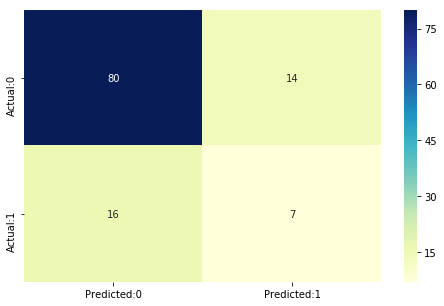

In [107]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [108]:
joblib.dump(svm,'model4')

['model4']